In [1]:
import pandas as pd
import  numpy as np
import  matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("C:\workspace\python-work\python 3\cs229-machine_learning-implement\ec-code\ex1-linear regression\ex1data1.txt",names=["population","profit"])
print(df.head())
print(df.info())
sns.lmplot('population','profit',df,fit_reg=False)
plt.show()


  

   population   profit
0      6.1101  17.5920
1      5.5277   9.1302
2      8.5186  13.6620
3      7.0032  11.8540
4      5.8598   6.8233
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
population    97 non-null float64
profit        97 non-null float64
dtypes: float64(2)
memory usage: 1.6 KB
None


<Figure size 500x500 with 1 Axes>

In [2]:
#两个特征向量的梯度下降
#ones=pd.DataFrame({"ones":np.ones(len(df))})
#data=pd.concat([ones,df],axis=1)
# X=data.iloc[:,:-1]
# y=data.iloc[:,-1]
df.insert(0,"ones",1)
print(df.head())

X=df.iloc[:,:-1]
y=df.iloc[:,-1]
data=df.copy()
#cost function of each epoch
def lr_cost(theta,X,y):
    m=X.shape[0]
    inner=X @ theta - y
    cost= (inner.T @ inner)/(2*m)
    return cost

theta=np.zeros(X.shape[1])
print(lr_cost(theta,X,y))



#the derivative of theta j for costFunction
def gradient(theta,X,y):
    inner=X.T @ (X @ theta - y)
    return inner/(X.shape[0])



#batch gradient descent 
def batch_gradient_descent(theta,X,y,epoch,alpha=0.01):
    cost_arr=[lr_cost(theta,X,y)]
    new_theta=theta.copy()
  
    for i in range(epoch):
        #print(new_theta)
        new_theta=new_theta-alpha*gradient(new_theta,X,y)
        cost_arr.append(lr_cost(new_theta,X,y))
    return new_theta.values,cost_arr
    
final_theta,cost_arr=batch_gradient_descent(theta,X,y,500)
print(final_theta,cost_arr[0],cost_arr[-1])


   ones  population   profit
0     1      6.1101  17.5920
1     1      5.5277   9.1302
2     1      8.5186  13.6620
3     1      7.0032  11.8540
4     1      5.8598   6.8233
32.07273387745567


[-2.28286727  1.03099898] 32.07273387745567 4.7138095311168655


4.7138095311168655


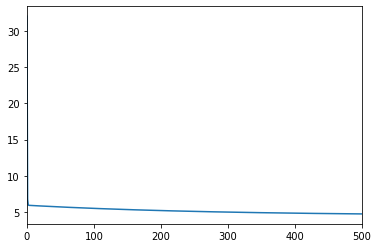

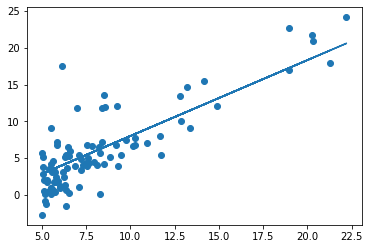

In [4]:
last_cost=lr_cost(final_theta,X,y)
print(last_cost)


sns.tsplot(cost_arr)
plt.show()

intercept=final_theta[0]
slope=final_theta[1]
plt.scatter(data.population,data.profit)
plt.plot(data.population,data.population*slope+intercept)
plt.show()


In [5]:
#三个特征值（包含了常量b)
raw_data=pd.read_csv("C:\workspace\python-work\python 3\cs229-machine_learning-implement\ec-code\ex1-linear regression\ex1data2.txt",
                     names=["square","rooms","price"])
print(raw_data.head())


#特征缩放
def normalize_fiture(df):
    return (df-df.mean())/df.std()
    #return df.apply(lambda column:(column-column.mean())/column.std())

data=normalize_fiture(raw_data) 
print("\n\n",data.head())

ones=pd.DataFrame({"ones":np.ones(len(data))})
data=pd.concat([ones,data],axis=1)
print("\n",data.head())

X=data.iloc[:,:-1]
print("\n",X.head())

y=data.iloc[:,-1]
print("\n",y.head())

   square  rooms   price
0    2104      3  399900
1    1600      3  329900
2    2400      3  369000
3    1416      2  232000
4    3000      4  539900


      square     rooms     price
0  0.130010 -0.223675  0.475747
1 -0.504190 -0.223675 -0.084074
2  0.502476 -0.223675  0.228626
3 -0.735723 -1.537767 -0.867025
4  1.257476  1.090417  1.595389

    ones    square     rooms     price
0   1.0  0.130010 -0.223675  0.475747
1   1.0 -0.504190 -0.223675 -0.084074
2   1.0  0.502476 -0.223675  0.228626
3   1.0 -0.735723 -1.537767 -0.867025
4   1.0  1.257476  1.090417  1.595389

    ones    square     rooms
0   1.0  0.130010 -0.223675
1   1.0 -0.504190 -0.223675
2   1.0  0.502476 -0.223675
3   1.0 -0.735723 -1.537767
4   1.0  1.257476  1.090417

 0    0.475747
1   -0.084074
2    0.228626
3   -0.867025
4    1.595389
Name: price, dtype: float64


[-1.18994649e-16  8.30383883e-01  8.23982853e-04]          0.4893617021276597       0.13195133775794732


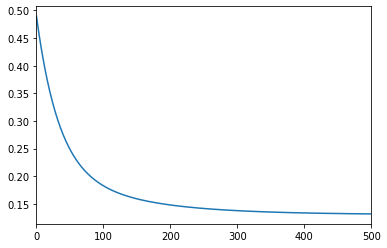

In [8]:
theta=np.zeros(X.shape[1])
final_theta,cost_arr=batch_gradient_descent(theta,X,y,500)
print(final_theta,"        ",cost_arr[0],"     ",cost_arr[-1])
sns.tsplot(cost_arr)
plt.show()

In [10]:
#测试不同learning rate 的效果
base = np.logspace(-1,-5,num=5)


print(base,"  ",type(base))
candicate=np.sort(   np.concatenate(  (base,base*3)   )    )
print(candicate,"    ",type(candicate))


[1.e-01 1.e-02 1.e-03 1.e-04 1.e-05]    <class 'numpy.ndarray'>
[1.e-05 3.e-05 1.e-04 3.e-04 1.e-03 3.e-03 1.e-02 3.e-02 1.e-01 3.e-01]      <class 'numpy.ndarray'>


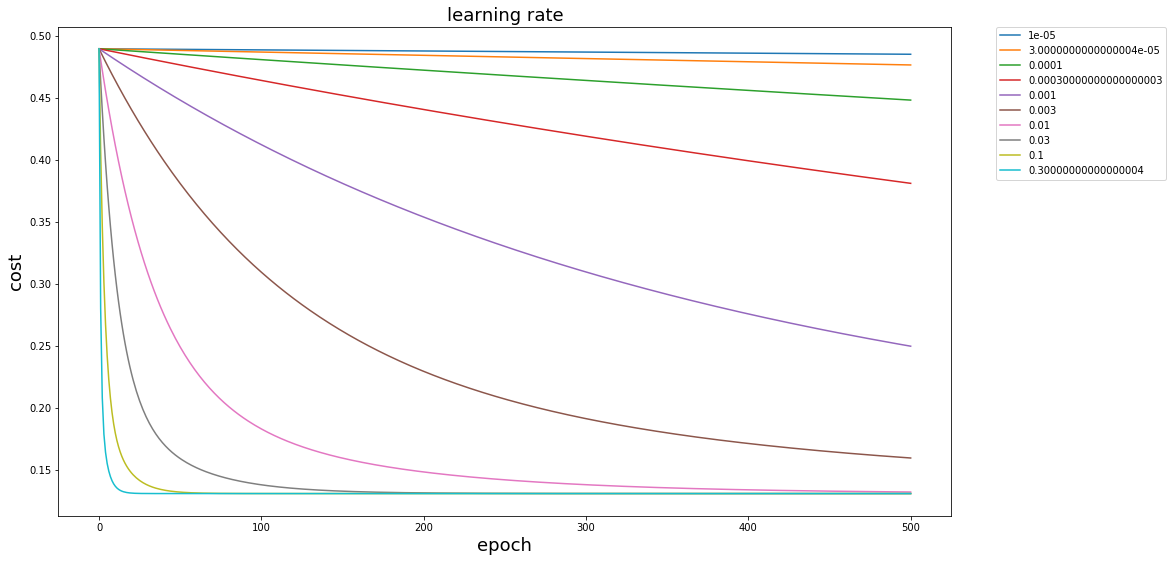

In [12]:
fig,ax=plt.subplots(figsize=(16,9))
for alpha in candicate:
    fianl_theta,cost_arr=batch_gradient_descent(theta,X,y,500,alpha)
    ax.plot(cost_arr,label=alpha)
    
ax.set_xlabel('epoch', fontsize=18)
ax.set_ylabel('cost', fontsize=18)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_title('learning rate', fontsize=18)
plt.show()

In [14]:
#the normal equation           theta  = (X.T @ X)的逆函数 @ X.T @  y
def normal_eqn(X,y):
    theta=np.linalg.inv(X.T @ X ) @ X.T @ y
    return theta
print(X.head(),y.head())
final_theta2=normal_eqn(X,y)
print("\n\nfianl theta2\n",final_theta2,"\n\n final theata",final_theta)




   ones    square     rooms
0   1.0  0.130010 -0.223675
1   1.0 -0.504190 -0.223675
2   1.0  0.502476 -0.223675
3   1.0 -0.735723 -1.537767
4   1.0  1.257476  1.090417 0    0.475747
1   -0.084074
2    0.228626
3   -0.867025
4    1.595389
Name: price, dtype: float64


fianl theta2
 0   -1.086173e-16
1    8.847660e-01
2   -5.317882e-02
dtype: float64 

 final theata [-1.18994649e-16  8.30383883e-01  8.23982853e-04]
